## Data Exploration and Visualization

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

customer = pd.read_csv('Joined Asset Pricing and Customer Data_CSV.csv')
customer.head()

Table Names-1                      Table Names  \
0  Asset Pricing Data.xlsx/S&P 500  Asset Pricing Data.xlsx/S&P 500   
1  Asset Pricing Data.xlsx/S&P 500  Asset Pricing Data.xlsx/S&P 500   
2  Asset Pricing Data.xlsx/S&P 500  Asset Pricing Data.xlsx/S&P 500   
3  Asset Pricing Data.xlsx/S&P 500  Asset Pricing Data.xlsx/S&P 500   
4  Asset Pricing Data.xlsx/S&P 500  Asset Pricing Data.xlsx/S&P 500   

             Name                        Email  Phone Number  Age  Gender  \
0    Sherry Booth    Sherry.Booth@email123.com     555151667   24  Female   
1   Richard Stein   Richard.Stein@email123.com     555372072   23    Male   
2     Jack Miller     Jack.Miller@email123.com     555492798   23    Male   
3  Matthew Newman  Matthew.Newman@email123.com     555395212   26    Male   
4  Brandon Fowler  Brandon.Fowler@email123.com     555307374   18    Male   

  Job Sector   Account Manager  Number of Bitcoins  ... Low_First_Purchase  \
0     Retail     Bobby Rubbert            0.029590  ...            3853.50   
1     Retail  Felita Cauldwell            0.133611  ...            3910.86   
2   Software   Winonah Stubbin            0.362464  ...            3953.44   
3   Business         Susan Pim            0.108592  ...            3885.73   
4  Education      Alden Collar            0.414351  ...            3805.59   

  Close_First_Purchase  Volume_First_Purchase  Asset_Most_Recent_Purchase  \
0              3909.52           4.940800e+09                     S&P 500   
1              3915.46           4.043170e+09                     S&P 500   
2              3962.71           4.604870e+09                     S&P 500   
3              3898.81           5.827250e+09                     S&P 500   
4              3881.37           6.280650e+09                     S&P 500   

  Date_Most_Recent_Purchase Open_Most_Recent_Purchase  \
0                 3/31/2021                   3967.25   
1                 3/18/2021                   3953.50   
2                 3/29/2021                   3969.31   
3                 3/22/2021                   3916.48   
4                  3/2/2021                   3903.64   

  High_Most_Recent_Purchase  Low_Most_Recent_Purchase  \
0                   3994.41                   3966.98   
1                   3969.62                   3910.86   
2                   3981.83                   3943.25   
3                   3955.31                   3914.16   
4                   3906.41                   3868.57   

   Close_Most_Recent_Purchase  Volume_Most_Recent_Purchase  
0                     3972.89                 4.564980e+09  
1                     3915.46                 4.043170e+09  
2                     3971.09                 4.619840e+09  
3                     3940.59                 4.311380e+09  
4                     3870.29                 5.493690e+09  

[5 rows x 29 columns]

In [108]:
#I don't think email and phone number is useful in any case
customer = customer.drop(['Table Names-1','Table Names','Email', 'Phone Number'], axis = 1)
#Analytics questions - Most successful account manager/broker? Do they perform better with clients from a particular 
#job sector? What about demographic? Which which mangager is most/least successful at getting multiple purchases? 
#Any major difference in most recent purchase date vs first purchase date? Who sells the most number of bitcoins?
#Who are our best customers?

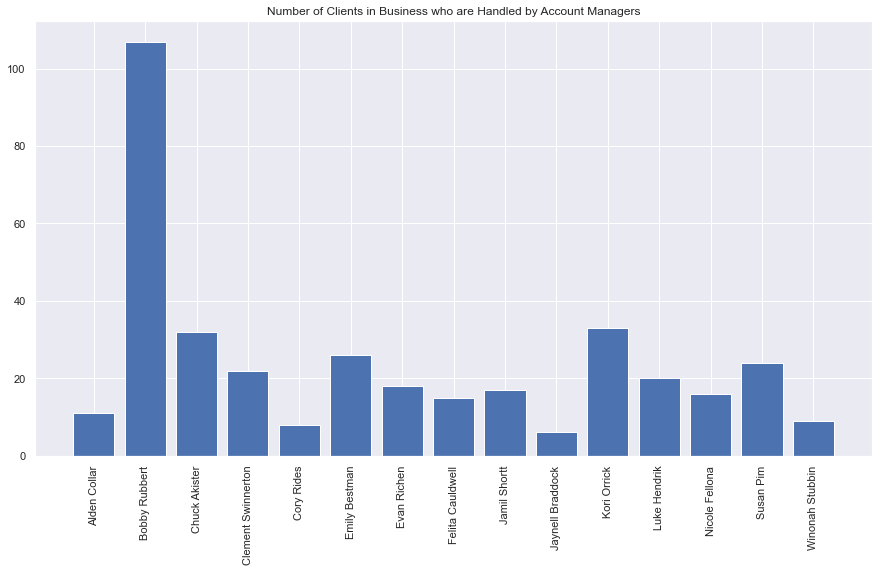

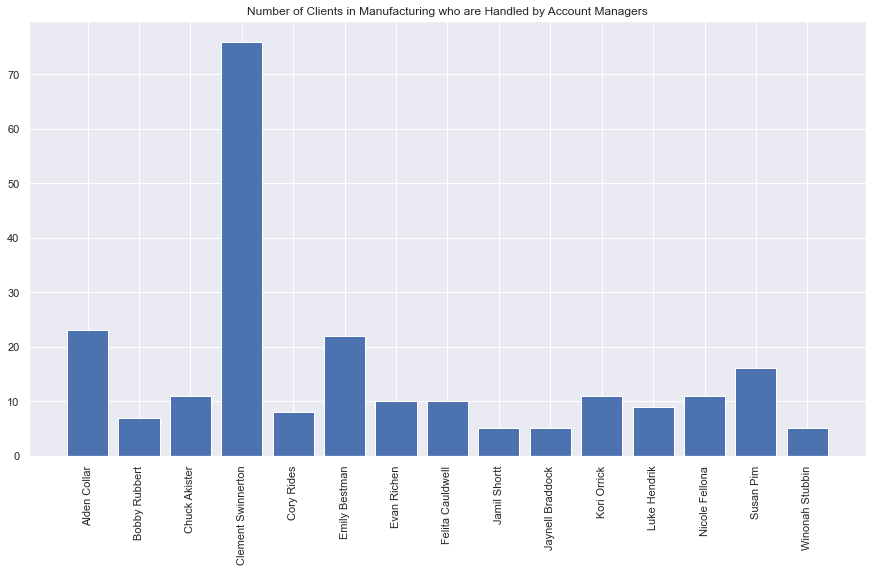

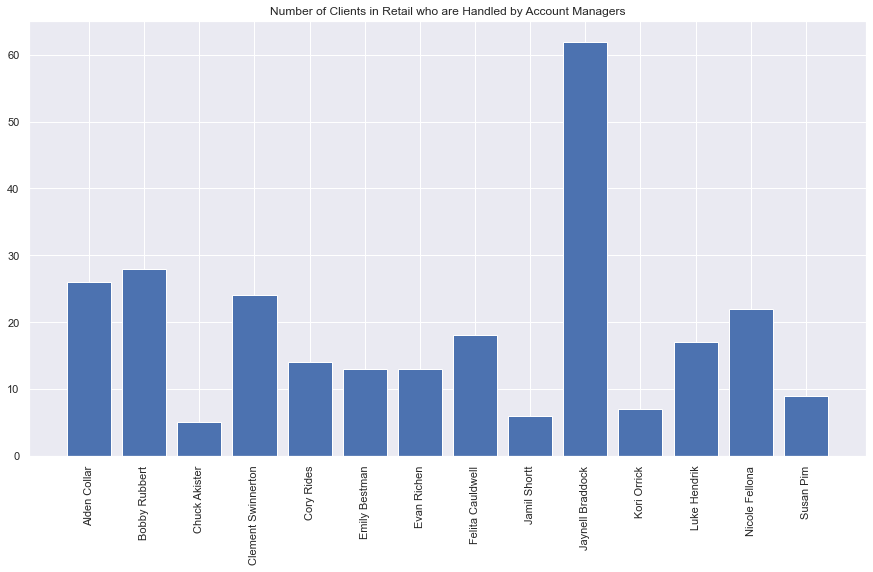

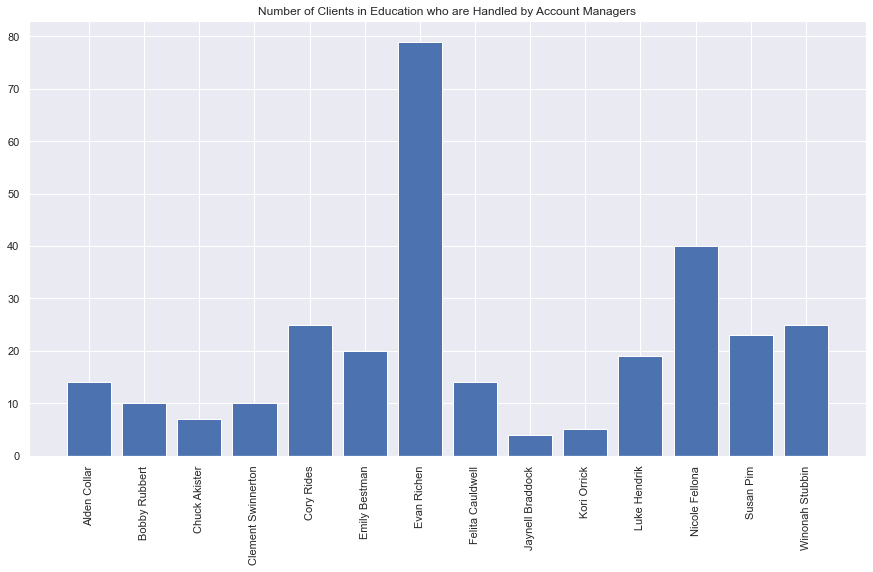

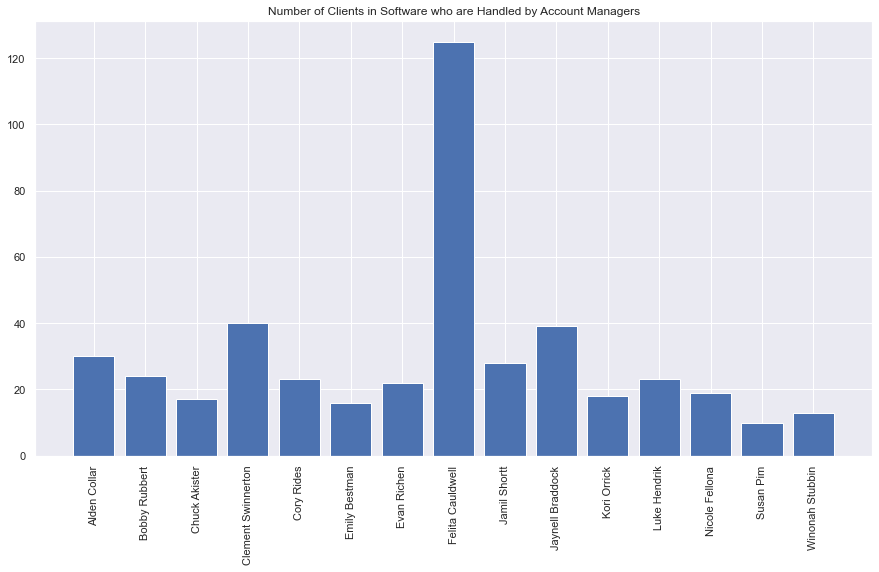

In [109]:
manJ = customer.groupby(['Job Sector', 'Account Manager']).size().reset_index(name='counts')

b = manJ.loc[manJ['Job Sector'] == 'Business']
e = manJ.loc[manJ['Job Sector'] == 'Education']
m = manJ.loc[manJ['Job Sector'] == 'Manufacturing']
r = manJ.loc[manJ['Job Sector'] == 'Retail']
s = manJ.loc[manJ['Job Sector'] == 'Software']

bx = b['counts'].values.tolist()
ex = e['counts'].values.tolist()
mx = m['counts'].values.tolist()
rx = r['counts'].values.tolist()
sx = s['counts'].values.tolist()

bar = manJ['Account Manager'].unique().tolist()
y_pos = np.arange(len(bar))

plt.bar(y_pos, bx)
plt.title('Number of Clients in Business who are Handled by Account Managers')
plt.xticks(y_pos, bar, rotation = 90)
plt.show()

plt.bar(y_pos, mx)
plt.title('Number of Clients in Manufacturing who are Handled by Account Managers')
plt.xticks(y_pos, bar, rotation = 90)
plt.show()

rbar = r['Account Manager'].unique().tolist()
y_pos = np.arange(len(rbar))

plt.bar(y_pos, rx)
plt.title('Number of Clients in Retail who are Handled by Account Managers')
plt.xticks(y_pos, rbar, rotation = 90)
plt.show()

ebar = e['Account Manager'].unique().tolist()
y_pos = np.arange(len(ebar))
plt.bar(y_pos, ex)
plt.title('Number of Clients in Education who are Handled by Account Managers')
plt.xticks(y_pos, ebar, rotation = 90)
plt.show()

sbar = s['Account Manager'].unique().tolist()
y_pos = np.arange(len(sbar))

plt.bar(y_pos, sx)
plt.title('Number of Clients in Software who are Handled by Account Managers')
plt.xticks(y_pos, sbar, rotation = 90)
plt.show()



In [110]:
#ageG = customer.groupby(['Age', 'Gender'])
#customer['Gender'] = customer['Gender'].map({'Male':1, 'Female':0})
#customer['Job Sector'] = customer['Job Sector'].map({''})
customer_sub = customer[['Age', 'Gender', 'Job Sector', 'Number of Bitcoins', 'Most Recent Purchase Size', 'Number of Purchases']]


In [111]:
#Above is me just playing around and doing data exploration. Modelling starts below.

In [112]:
customer.columns

Index(['Name', 'Age', 'Gender', 'Job Sector', 'Account Manager',
       'Number of Bitcoins', 'First Purchase Date',
       'Most Recent Purchase Date', 'Most Recent Purchase Size',
       'Number of Purchases', 'Broker Manager', 'Asset_First_Purchase',
       'Date_First_Purchase', 'Open_First_Purchase', 'High_First_Purchase',
       'Low_First_Purchase', 'Close_First_Purchase', 'Volume_First_Purchase',
       'Asset_Most_Recent_Purchase', 'Date_Most_Recent_Purchase',
       'Open_Most_Recent_Purchase', 'High_Most_Recent_Purchase',
       'Low_Most_Recent_Purchase', 'Close_Most_Recent_Purchase',
       'Volume_Most_Recent_Purchase'],
      dtype='object')

In [113]:
#Investigated variables in the potential model. 
look = customer[['Age', 'Gender', 'Job Sector', 'Number of Bitcoins', 'Number of Purchases', 'Most Recent Purchase Size']]
#320 rows have users whose most recent purchase is also the total number of bitcoins
#look = look.loc[look['Number of Bitcoins'] != look['Most Recent Purchase Size']]
#We have 1599 rows total. 320 / 1599 *100 = about 20% contain matchs

## Start of Modelling

In [131]:
from sklearn.model_selection import train_test_split
#Create dataframe for independent variables -- originally I only included the demographic data and ignored the market 
#information but felt it could be relevent so I added it.
x = customer[['Age', 'Gender', 'Job Sector', 'Number of Bitcoins', 'Number of Purchases']]
#One-hot encode the catagorical variables
x = pd.get_dummies(x)
look = pd.get_dummies(look)
#Make sure everything is in float
x = x.astype('float32')
#Fill NaN with previous values (assuming those would be closer to the "true" value then the average)
x = x.fillna(method ='pad')

y = customer[['Most Recent Purchase Size']]
y = y.astype('float32')
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.5, random_state = 0)

In [132]:
look

Age  Number of Bitcoins  Number of Purchases  Most Recent Purchase Size  \
0      24            0.029590                    3                   0.003288   
1      23            0.133611                    3                   0.022268   
2      23            0.362464                    3                   0.181232   
3      26            0.108592                    6                   0.054296   
4      18            0.414351                    3                   0.082870   
...   ...                 ...                  ...                        ...   
1594   37            0.102208                    4                   0.010221   
1595   41            0.809686                    8                   0.080969   
1596   27            0.239547                    6                   0.034221   
1597   28            0.301376                    3                   0.030138   
1598   38            0.341907                   10                   0.042738   

      Gender_Female  Gender_Male  Job Sector_Business  Job Sector_Education  \
0                 1            0                    0                     0   
1                 0            1                    0                     0   
2                 0            1                    0                     0   
3                 0            1                    1                     0   
4                 0            1                    0                     1   
...             ...          ...                  ...                   ...   
1594              1            0                    0                     0   
1595              0            1                    0                     0   
1596              0            1                    0                     0   
1597              0            1                    0                     0   
1598              1            0                    0                     0   

      Job Sector_Manufacturing  Job Sector_Retail  Job Sector_Software  
0                            0                  1                    0  
1                            0                  1                    0  
2                            0                  0                    1  
3                            0                  0                    0  
4                            0                  0                    0  
...                        ...                ...                  ...  
1594                         0                  1                    0  
1595                         0                  0                    1  
1596                         0                  0                    1  
1597                         0                  0                    1  
1598                         0                  0                    1  

[1599 rows x 11 columns]

In [133]:
#Table showing all the different correlations
cormat = look.corr()
round(cormat,2)

Age  Number of Bitcoins  Number of Purchases  \
Age                        1.00               -0.15                 0.01   
Number of Bitcoins        -0.15                1.00                 0.14   
Number of Purchases        0.01                0.14                 1.00   
Most Recent Purchase Size -0.07                0.79                -0.18   
Gender_Female             -0.02               -0.13                -0.06   
Gender_Male                0.02                0.13                 0.06   
Job Sector_Business        0.04                0.04                 0.03   
Job Sector_Education      -0.06               -0.04                -0.02   
Job Sector_Manufacturing  -0.01               -0.13                -0.33   
Job Sector_Retail         -0.03               -0.11                -0.22   
Job Sector_Software        0.05                0.19                 0.43   

                           Most Recent Purchase Size  Gender_Female  \
Age                                            -0.07          -0.02   
Number of Bitcoins                              0.79          -0.13   
Number of Purchases                            -0.18          -0.06   
Most Recent Purchase Size                       1.00          -0.06   
Gender_Female                                  -0.06           1.00   
Gender_Male                                     0.06          -1.00   
Job Sector_Business                             0.00          -0.02   
Job Sector_Education                           -0.04           0.06   
Job Sector_Manufacturing                       -0.03           0.06   
Job Sector_Retail                              -0.04           0.14   
Job Sector_Software                             0.09          -0.20   

                           Gender_Male  Job Sector_Business  \
Age                               0.02                 0.04   
Number of Bitcoins                0.13                 0.04   
Number of Purchases               0.06                 0.03   
Most Recent Purchase Size         0.06                 0.00   
Gender_Female                    -1.00                -0.02   
Gender_Male                       1.00                 0.02   
Job Sector_Business               0.02                 1.00   
Job Sector_Education             -0.06                -0.26   
Job Sector_Manufacturing         -0.06                -0.22   
Job Sector_Retail                -0.14                -0.24   
Job Sector_Software               0.20                -0.34   

                           Job Sector_Education  Job Sector_Manufacturing  \
Age                                       -0.06                     -0.01   
Number of Bitcoins                        -0.04                     -0.13   
Number of Purchases                       -0.02                     -0.33   
Most Recent Purchase Size                 -0.04                     -0.03   
Gender_Female                              0.06                      0.06   
Gender_Male                               -0.06                     -0.06   
Job Sector_Business                       -0.26                     -0.22   
Job Sector_Education                       1.00                     -0.19   
Job Sector_Manufacturing                  -0.19                      1.00   
Job Sector_Retail                         -0.21                     -0.18   
Job Sector_Software                       -0.30                     -0.25   

                           Job Sector_Retail  Job Sector_Software  
Age                                    -0.03                 0.05  
Number of Bitcoins                     -0.11                 0.19  
Number of Purchases                    -0.22                 0.43  
Most Recent Purchase Size              -0.04                 0.09  
Gender_Female                           0.14                -0.20  
Gender_Male                            -0.14                 0.20  
Job Sector_Business                    -0.24                -0.34  
Job Sector_Education                

<AxesSubplot:>

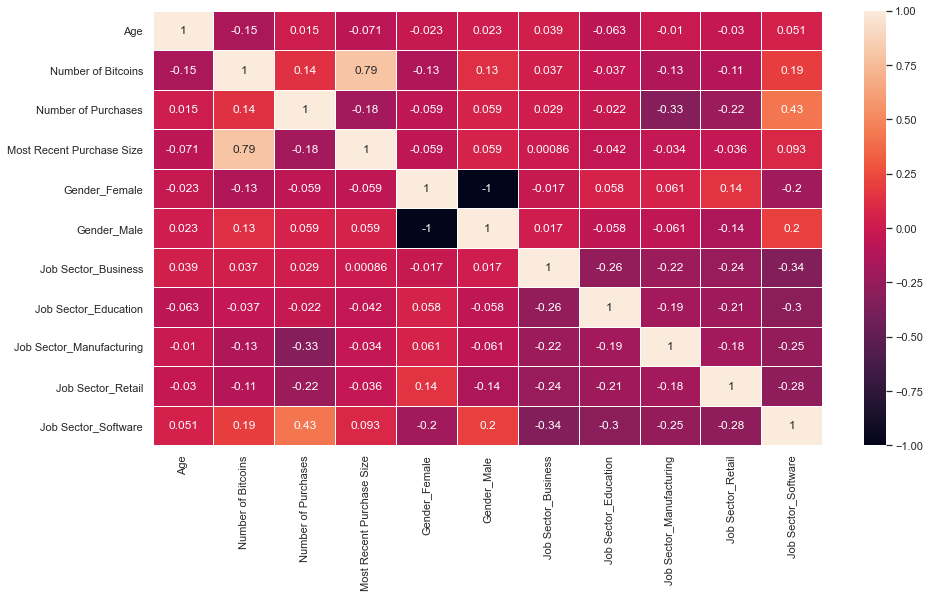

In [134]:
#Visualize the correlations as a heatmap
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cormat, annot = True, linewidths = 0.5)

In [135]:
#List of variables 
x.columns

Index(['Age', 'Number of Bitcoins', 'Number of Purchases', 'Gender_Female',
       'Gender_Male', 'Job Sector_Business', 'Job Sector_Education',
       'Job Sector_Manufacturing', 'Job Sector_Retail', 'Job Sector_Software'],
      dtype='object')

In [136]:
#Check if there are any remaining null values
x.isnull().values.any()

False

In [137]:
#Create a random forest model to predict purchase size
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Max depth for tree, min samples for node for leafs - done
#Correlation for features - done!
#Turn error into percentage like r^2 - done!
#Base model without additional hyperparameters was 0.018, 0.00201, 0.979
#Pruning the tree to a max depth of 5 had a minimal impact on accuracy. 
#Adding a parameter for minimal number of samples required to be a leaf node had a large impact on accuracy with higher numbers resulting in lower accuracy
#Anything greater than a 4 results in an r^2 lower than 90%. Smaller size means more likely to pick up noise in data. 5 seems to be the sweet spot between not picking up noise and not underfitting.
#With min # of samples required to split resulted in a lower accuracy (baseline) when > 30
reg = RandomForestRegressor(random_state = 0, min_samples_leaf = 5, max_depth = 5)
reg.fit(xtrain, ytrain)
ypred = reg.predict(xtest)
print('MAE: ', mean_absolute_error(ytest, ypred))
print('MSE: ', mean_squared_error(ytest, ypred))
print('R-Squared Score: ', r2_score(ytest.values.ravel(), ypred))

MAE:  0.03546171909956485
MSE:  0.014898854644888602
R-Squared Score:  0.8512532576446272


C:\Users\joshu\AppData\Local\Temp\ipykernel_14628\3426700645.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(xtrain, ytrain)


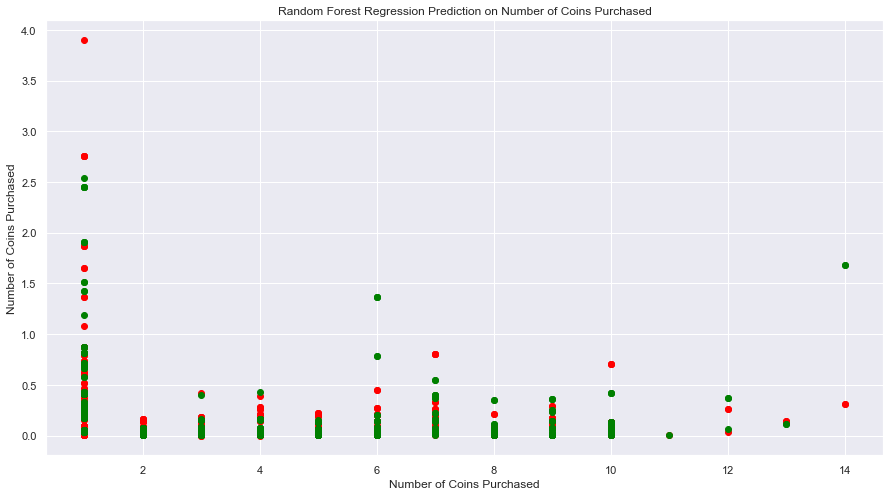

In [138]:
#Real values are in red, predicted values are in green. I can make more of these graphs if we want them. Otherwise leaving it in as an example.
plt.scatter(xtest['Number of Purchases'].values, ytest, color = 'red')
plt.scatter(xtest['Number of Purchases'].values, ypred, color = 'green')
plt.title('Random Forest Regression Prediction on Number of Coins Purchased')
plt.xlabel('Number of Coins Purchased')
plt.ylabel('Number of Coins Purchased')
plt.show() 

In [121]:
#'Open_First_Purchase', 'High_First_Purchase', 'Low_First_Purchase','Close_First_Purchase', 'Volume_First_Purchase',
#visualize tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree

fn = ['Age', 'Number of Bitcoins', 'Number of Purchases',
        'Gender_Female', 'Gender_Male',
       'Job Sector_Business', 'Job Sector_Education',
       'Job Sector_Manufacturing', 'Job Sector_Retail', 'Job Sector_Software']
cn = ['Most Recent Purchase Size']
estimator = reg.estimators_[5]

# Export as dot file
dot_graph = tree.export_graphviz(estimator, 
                out_file=None, 
                feature_names = fn,
                class_names = cn,
                rounded = True, proportion = False, 
                precision = 2, filled = True)
graph = graphviz.Source(dot_graph)

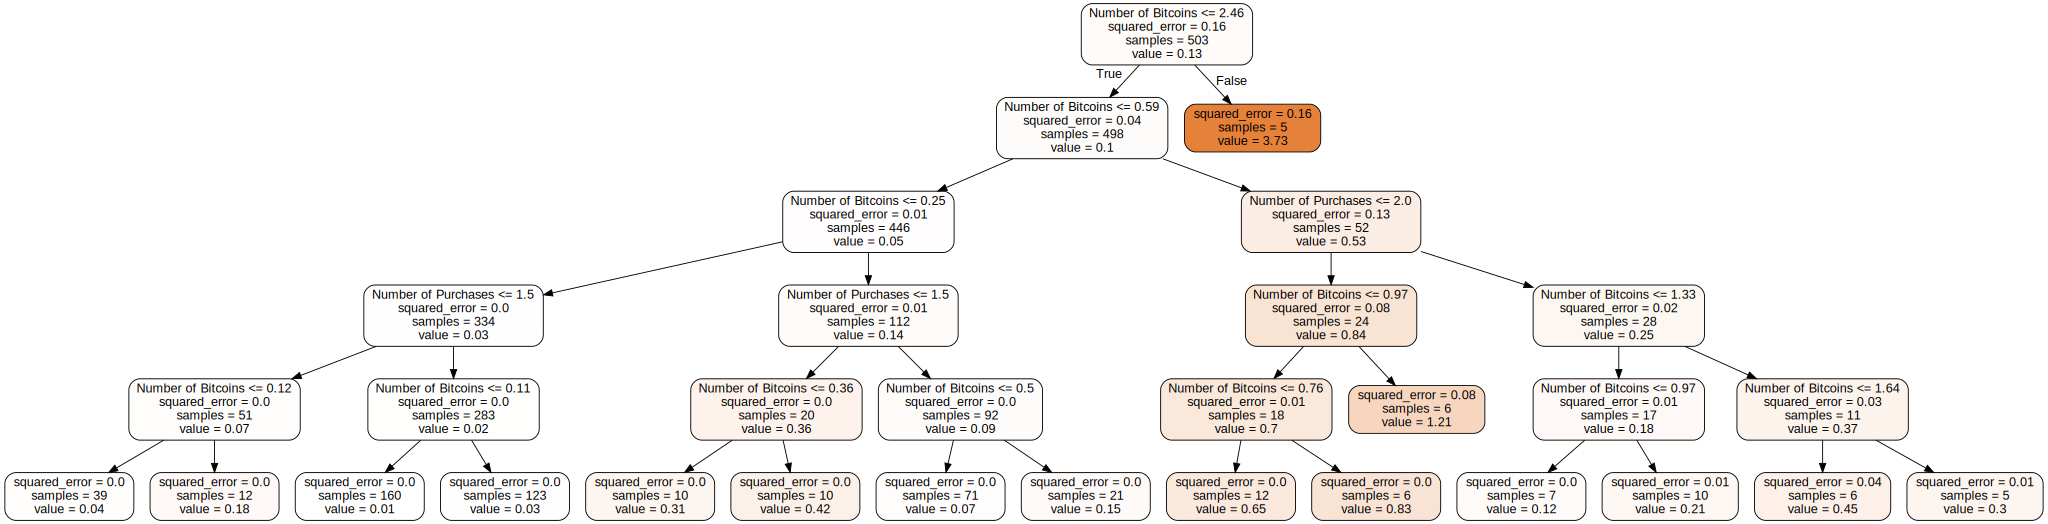

In [122]:
#Enjoy looking at this monster
graph

In [123]:
#Save tree image to hard drive
def dot_to_img(dot, file = 'report.png'):
    import os

    name, ext = os.path.splitext(file)

    graph = graphviz.Source(dot)
    graph.format = ext[1:]
    graph.view(name, cleanup = True) 
dot_to_img(dot_graph)

<BarContainer object of 10 artists>

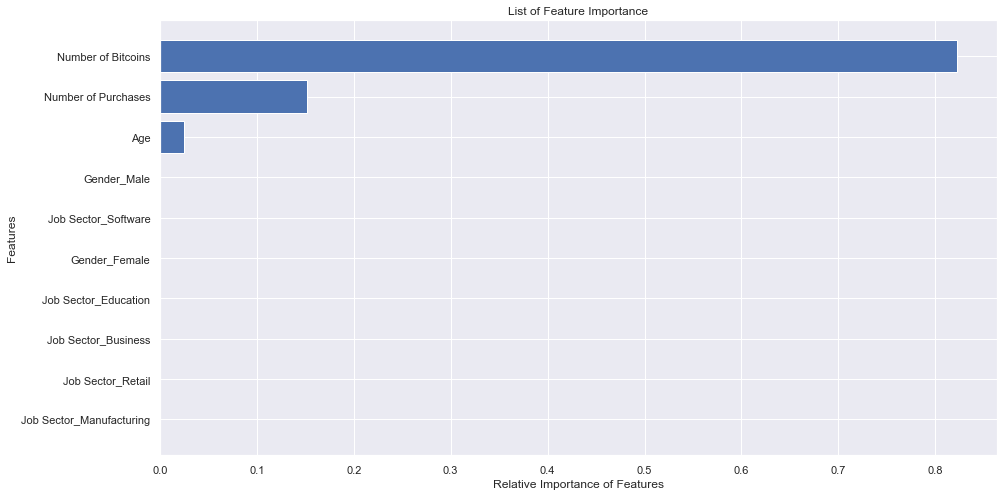

In [124]:
#Visualize feature importance
f_i = list(zip(x,reg.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.title("List of Feature Importance")
plt.xlabel("Relative Importance of Features")
plt.ylabel("Features")
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])